<a href="https://colab.research.google.com/github/ishumann/Coding-Implementation/blob/main/Transfer_Learning_with_fine_tuning_and_augmentation_on_cat_vs_dog_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"imprime","key":"ca9360fba8beabaa892bb7075b2dc89a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:

!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:04<00:00, 251MB/s]
100% 1.06G/1.06G [00:04<00:00, 258MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/dogs-vs-cats.zip' mode='r'>>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(weights='imagenet', include_top = False, input_shape=(150,150,3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

'input_1'

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True

    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
    print(layer.name, layer.trainable)


input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(1, activation= 'sigmoid'))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array,load_img

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip =True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator  = train_datagen.flow_from_directory('/content/train/',
                                                     target_size= (150,150),
                                                     batch_size= batch_size,
                                                     class_mode= 'binary'
                                                     )


val_generator  = test_datagen.flow_from_directory('/content/test/',
                                                     target_size= (150,150),
                                                     batch_size= batch_size,
                                                     class_mode= 'binary'
                                                     )


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-5), loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit_generator(train_generator, epochs=5, validation_data=val_generator )

<ipython-input-35-941c34c4ab11>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=5, validation_data=val_generator )


Epoch 1/5
625/625 [==============================] - 177s 266ms/step - loss: 0.7736 - accuracy: 0.6338 - val_loss: 0.3535 - val_accuracy: 0.8968
Epoch 2/5
625/625 [==============================] - 152s 243ms/step - loss: 0.2307 - accuracy: 0.9099 - val_loss: 0.1641 - val_accuracy: 0.9280
Epoch 3/5
625/625 [==============================] - 152s 244ms/step - loss: 0.1935 - accuracy: 0.9241 - val_loss: 0.1572 - val_accuracy: 0.9428
Epoch 4/5
625/625 [==============================] - 153s 244ms/step - loss: 0.1708 - accuracy: 0.9380 - val_loss: 0.1313 - val_accuracy: 0.9466
Epoch 5/5
625/625 [==============================] - 155s 248ms/step - loss: 0.1473 - accuracy: 0.9445 - val_loss: 0.2124 - val_accuracy: 0.9190


In [ ]:
import matplotlib.pyplot as plt


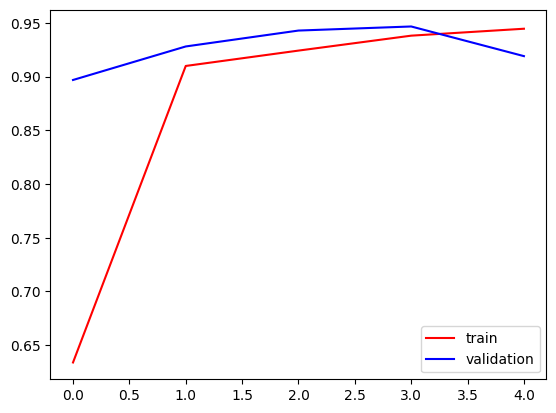

In [ ]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

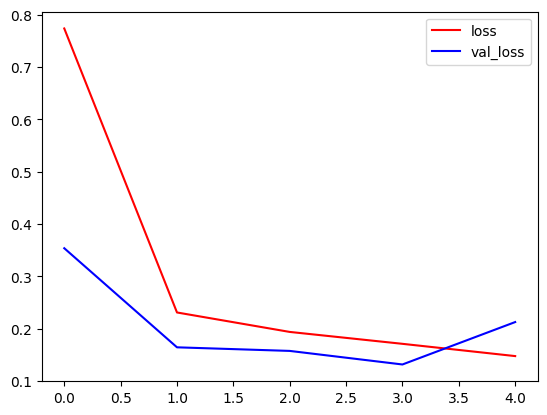

In [ ]:
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='blue', label='val_loss')
plt.legend()
plt.show()